In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%reload_ext autoreload
%autoreload 2

check this video: https://www.youtube.com/watch?v=6GUZXDef2U0&list=PLCN-JplaYuP4gDPNweg-bbGwNL36A3Hog&index=83&t=307s
To load data, normally we would use pandas such as: df = pd.read_csv("file.csv")
df.head()
But instead, we can as well use the seaborn many built-in datasets.

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [2]:
crash_df = sns.load_dataset("car_crashes")

In [6]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Distribution plot
in the video, sns.distplot(crash_df["not_distracted"], kde=False) was used but apparently it is deprecated.

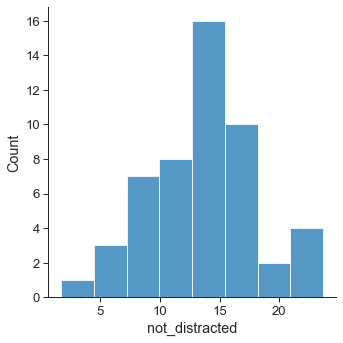

In [52]:
sns.displot(crash_df["not_distracted"]) #number of crashes where people were not distracted.
#sns.displot(crash_df["not_distracted"], bins=25)

Joint plot

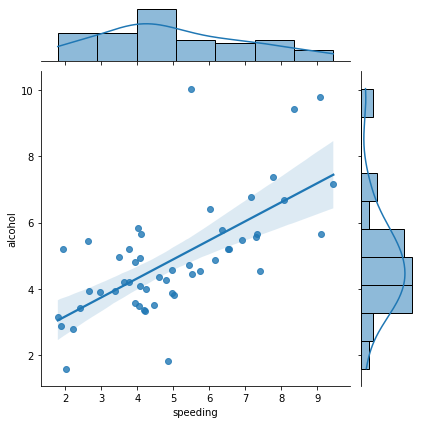

In [16]:
sns.jointplot(x="speeding", y='alcohol', data=crash_df, kind="reg") #reg is regression

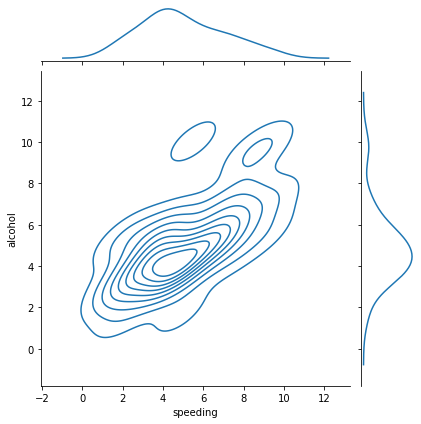

In [17]:
sns.jointplot(x="speeding", y='alcohol', data=crash_df, kind="kde") #kde is kernel density estimator

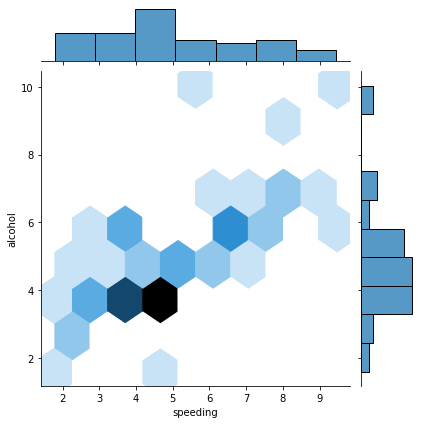

In [18]:
sns.jointplot(x="speeding", y='alcohol', data=crash_df, kind="hex") #hex is hexagone distribution

KDE plot

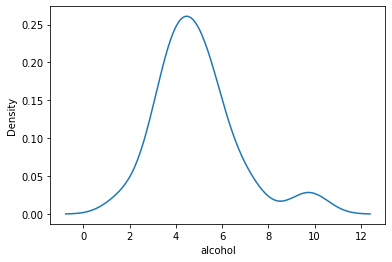

In [19]:
sns.kdeplot(crash_df['alcohol'])#regarding crashes related to alcohol usage

Pair plot
relationship through the entire dataframe

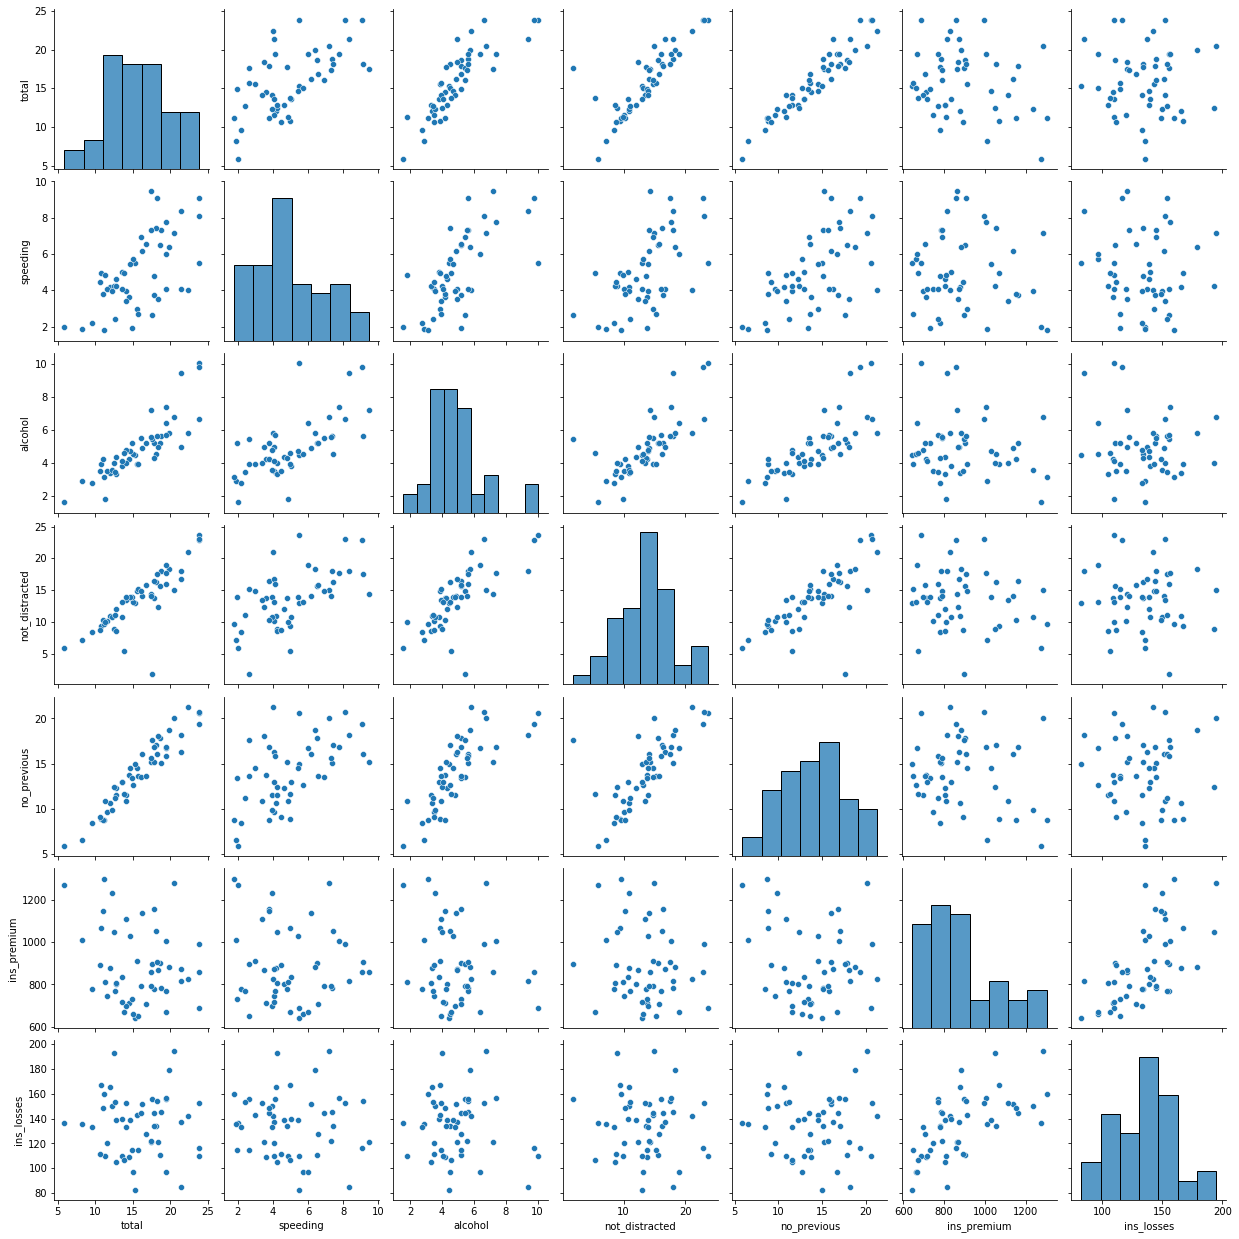

In [20]:
sns.pairplot(crash_df)

In [3]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


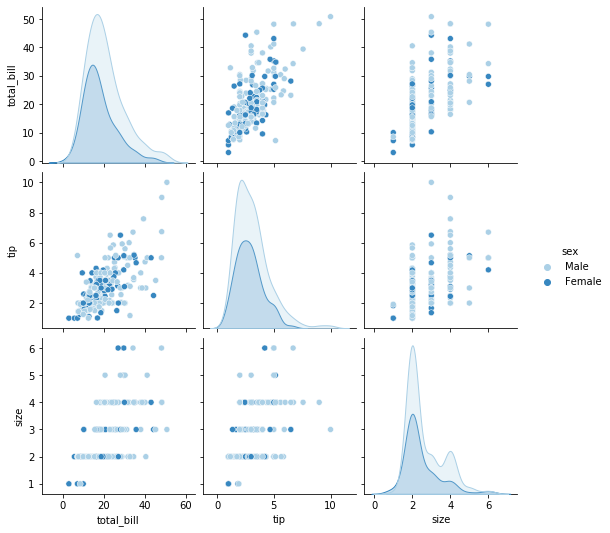

In [23]:
sns.pairplot(tips_df, hue='sex', palette='Blues')#hue passes categorical data

Rug plot

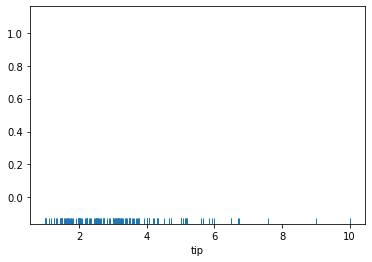

In [25]:
sns.rugplot(tips_df['tip'])

Styling

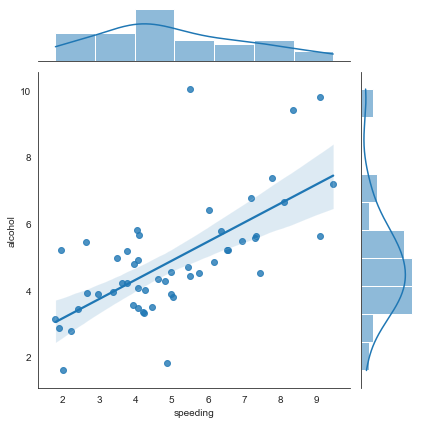

In [27]:
sns.set_style("white")
sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind="reg")

<Figure size 576x288 with 0 Axes>

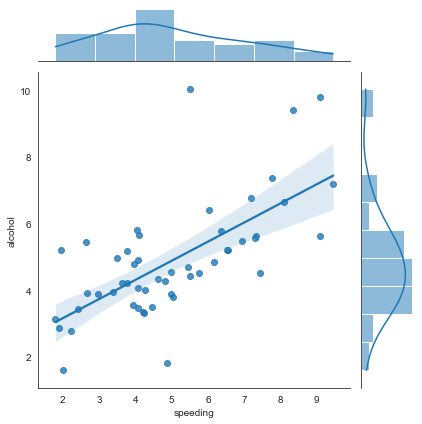

In [28]:
#to change the size of the plot:
sns.set_style("white")
plt.figure(figsize=(8,4))
sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind="reg")

<Figure size 576x288 with 0 Axes>

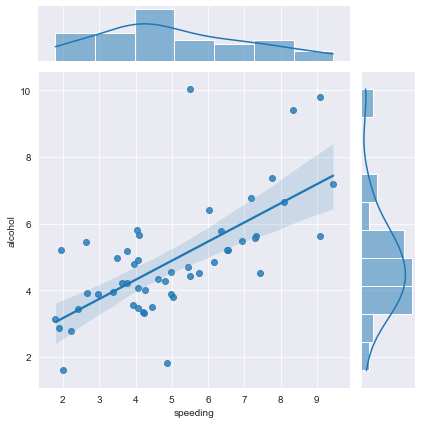

In [32]:
#darkgrid:
sns.set_style("darkgrid")#also try whitegrid, or dark, or ticks
plt.figure(figsize=(8,4))
sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind="reg")

<Figure size 576x288 with 0 Axes>

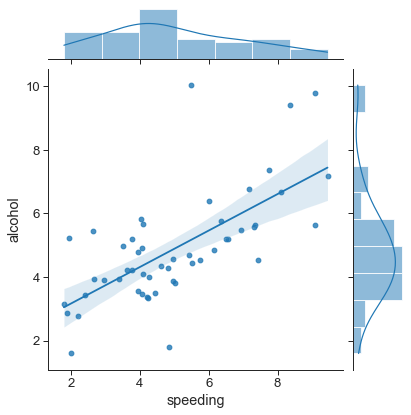

In [62]:
#Changing labelling and font scale
sns.set_style("ticks")#also try whitegrid, or dark, or ticks
plt.figure(figsize=(8,4))
sns.set_context("paper", font_scale=1.5)#for manuscript/publications
#replace paper with talk for presentations
#or poster for poster presentations.
sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind="reg")

c:\users\nttdo\learning.python\.lpvenv\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


<Figure size 576x288 with 0 Axes>

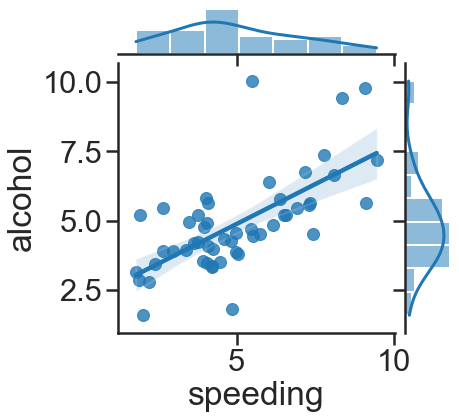

In [38]:
sns.set_style("ticks")#also try whitegrid, or dark, or ticks
plt.figure(figsize=(8,4))
sns.set_context("poster", font_scale=1.4)#for manuscript/publications
#replace paper with talk for presentations
#or poster for poster presentations.
sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind="reg")

<Figure size 576x288 with 0 Axes>

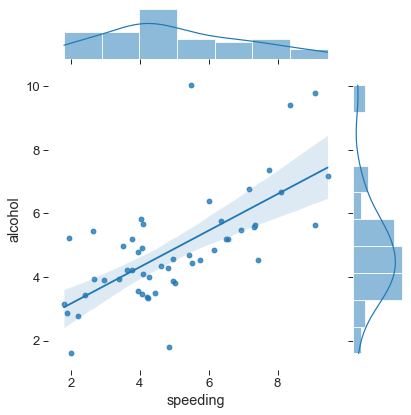

In [63]:
#to despine the axes
sns.set_style("ticks")#also try whitegrid, or dark, or ticks
plt.figure(figsize=(8,4))
sns.set_context("paper", font_scale=1.5)#for manuscript/publications
#replace paper with talk for presentations
#or poster for poster presentations.
sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind="reg")
sns.despine(left=True, bottom=True)

CATEGORICAL PLOTS

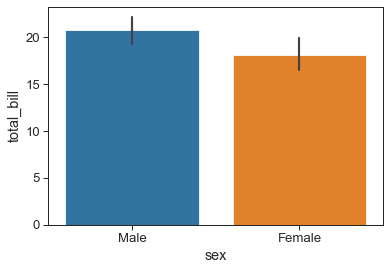

In [42]:
sns.barplot(x='sex', y='total_bill', data=tips_df)
#the lines within each bar represent the variance between males and females in relation to total bill.

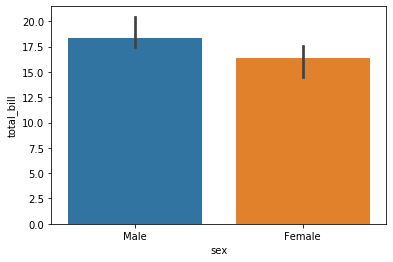

In [9]:
#to change the estimator, to mean, median etc:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)#uses numpy to calculate the median
#can replace median with standard deviation: std, variance: var, covariance: cov

Countplot (counts the number of occurrences)

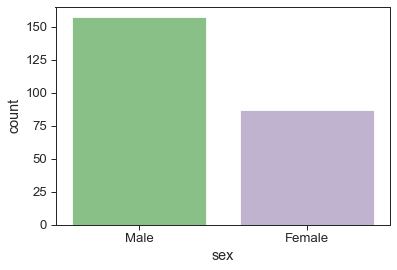

In [51]:
sns.countplot(x='sex', data=tips_df, palette='Accent')#don't forget to shift+tab to see options.

Boxplot

In [54]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


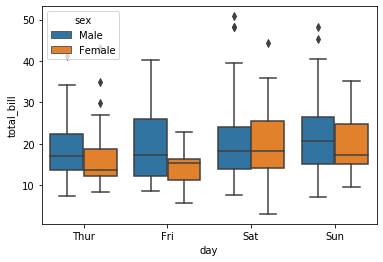

In [12]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

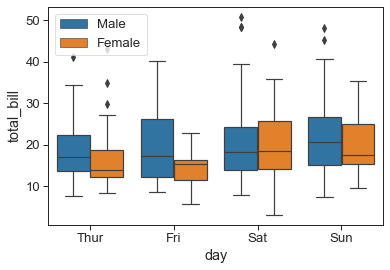

In [55]:
#to move the legend out of the way, i.e. reposition it in the corner.
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0)

Violin plot: combination of a box plot and a kde plot

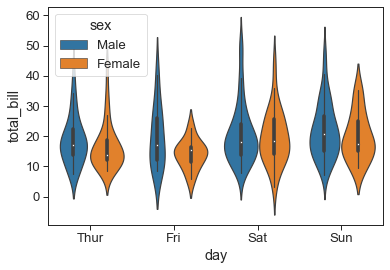

In [58]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex')

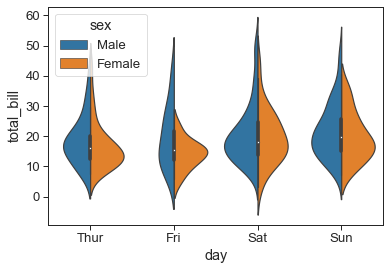

In [59]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)
#split allows to see how the category (sex) compare to each other

Strip plot (scatter plot where one data point is categorical)

<Figure size 576x360 with 0 Axes>

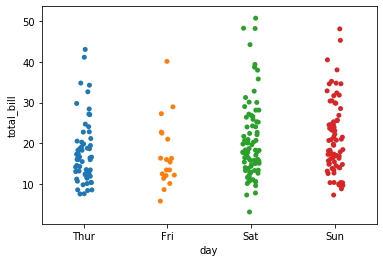

<Figure size 576x360 with 0 Axes>

In [15]:
sns.stripplot(x='day', y='total_bill', data=tips_df)
plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

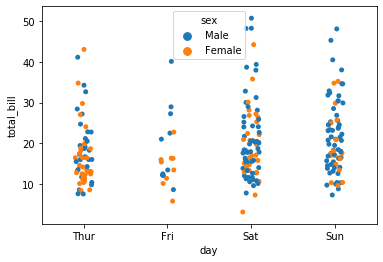

<Figure size 576x360 with 0 Axes>

In [19]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue="sex") #jitter is to spread the data a little bit.
plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

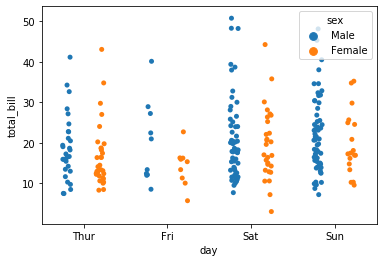

<Figure size 576x360 with 0 Axes>

In [20]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue="sex", dodge=True)#dodge separates men form women 
plt.figure(figsize=(8,5))

Swarm plot

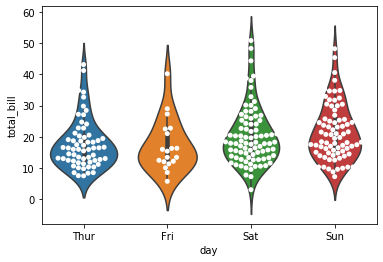

In [24]:
sns.violinplot(x="day", y="total_bill", data=tips_df)
sns.swarmplot(x="day", y="total_bill", data=tips_df, color="white")

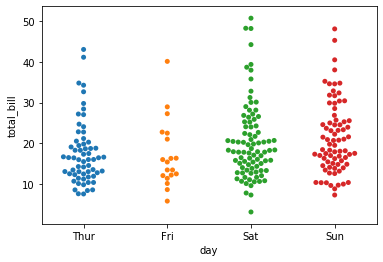

In [25]:
#Swarm plot on its own:
sns.swarmplot(x="day", y="total_bill", data=tips_df)

Palettes
see: https://matplotlib.org/stable/tutorials/colors/colormaps.html

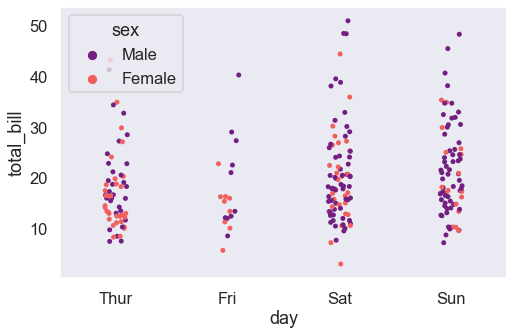

In [27]:
plt.figure(figsize=(8,5))
sns.set_style("dark")#can change to white
sns.set_context("talk")
sns.stripplot(x="day", y="total_bill", data=tips_df, hue="sex", palette="magma")#check other palette options in link above.

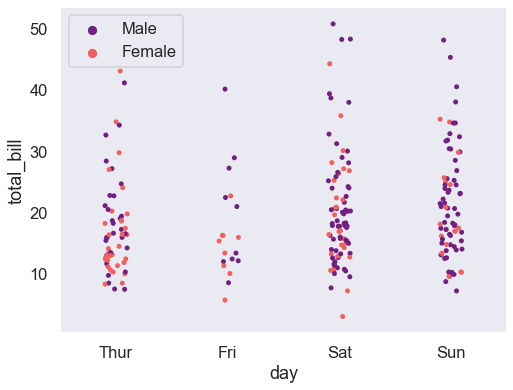

In [29]:
plt.figure(figsize=(8,6))#changed from 8,5 to make legend fit better.
sns.set_style("dark")#can change to white
sns.set_context("talk")
sns.stripplot(x="day", y="total_bill", data=tips_df, hue="sex", palette="magma")
plt.legend(loc=0)

check legend options: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
'upper right'	1
'upper left'	2
'lower left'	3
'lower right'	4

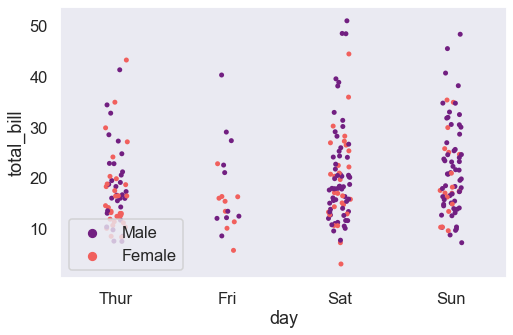

In [31]:
plt.figure(figsize=(8,5))
sns.set_style("dark")
sns.set_context("talk")
sns.stripplot(x="day", y="total_bill", data=tips_df, hue="sex", palette="magma")
plt.legend(loc=3)

In [44]:
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.4)
#let's use the crash dataframe
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<Figure size 576x432 with 0 Axes>

In [37]:
#we need to correlate the data above, example, column headers will be placed as row headers too:
crash_mx = crash_df.corr()
crash_mx.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359


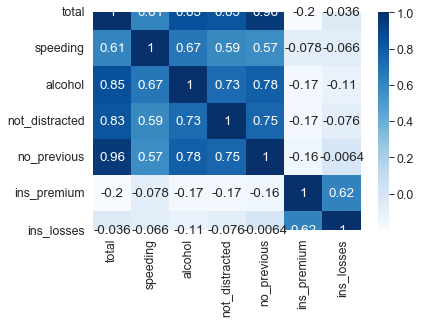

In [45]:
sns.heatmap(crash_mx, annot=True, cmap="Blues")#we want numbers to appear in the centre of each colour by annot=T

In [46]:
#Let's use another dataset:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [47]:
#let's create a pivot table
flights = flights.pivot_table(index="month", columns="year", values="passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


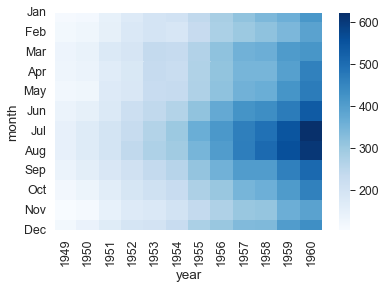

In [48]:
sns.heatmap(flights, cmap="Blues")

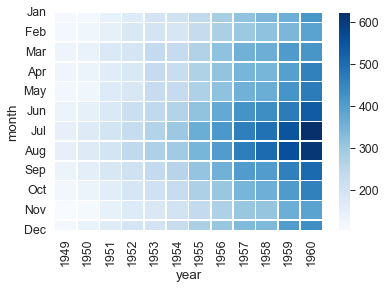

In [51]:
#adding lines in the figure:
sns.heatmap(flights, cmap="Blues", linecolor="white", linewidth=0.5)

Cluster map

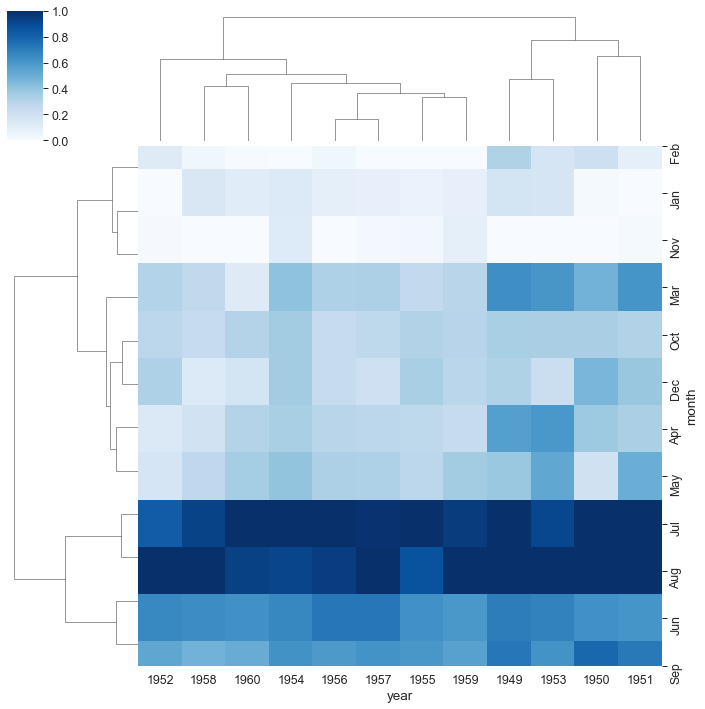

In [55]:
#using the flight data
sns.clustermap(flights, cmap="Blues", standard_scale=1)#standard_scale will normalise the data, to focus on the clustering.
#you will see that the x axis: years are not in order because clustermap repositions data to find cluster relationships.
#Heatmap doesn't mess with the data, i.e. the order.

In [53]:
#let's get the iris dataset
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


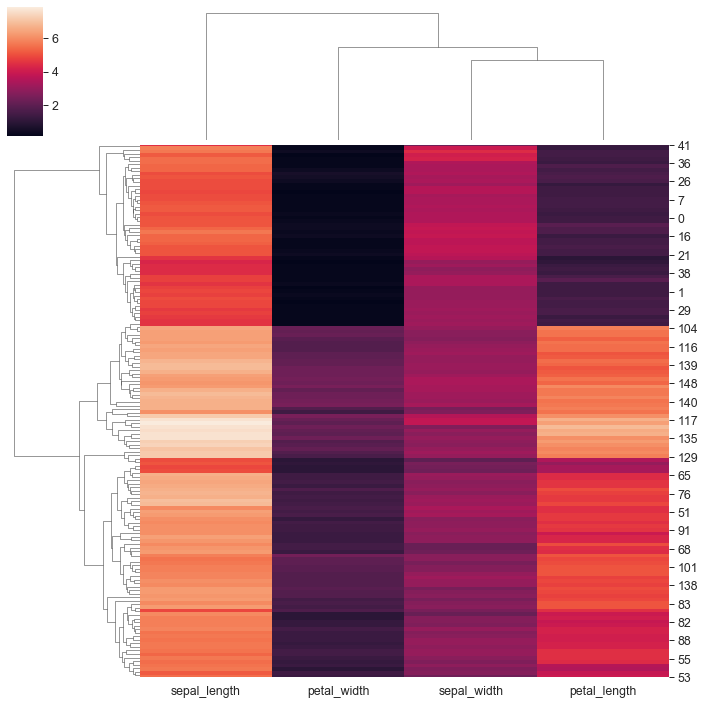

In [54]:
#say we want to return values based on the different species
species = iris.pop("species")
sns.clustermap(iris)

PairGrid
based on pair plots

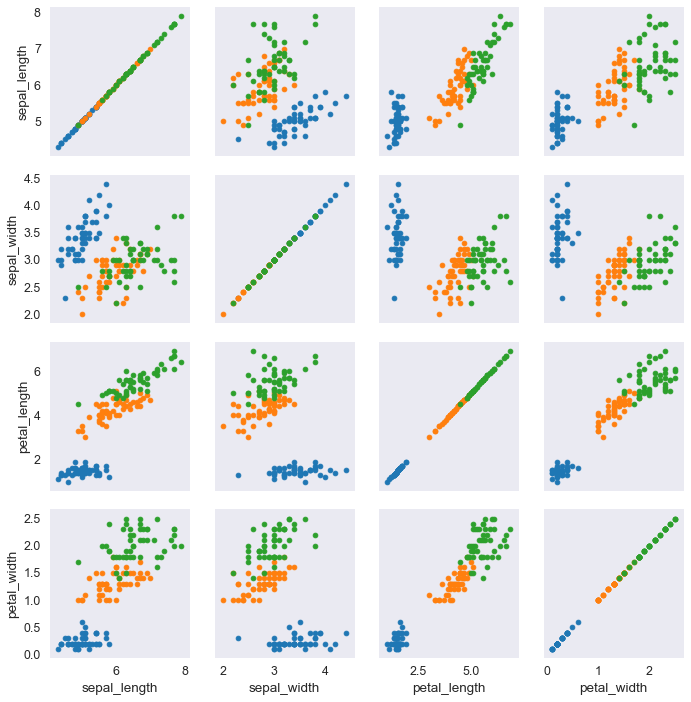

In [58]:
#let's first create a grid system based on the iris dataset
iris = sns.load_dataset("iris")#reload because previously i had popped out the species.
iris_g = sns.PairGrid(iris, hue="species")#the data shown in the scatter plot are the species
#plot a scatter plot across
iris_g.map(plt.scatter)

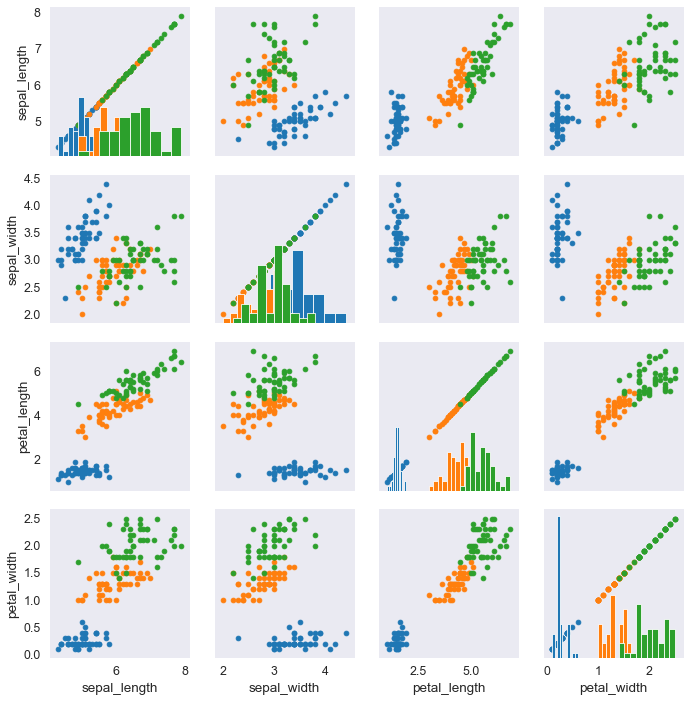

In [59]:
#say i want to plot a histogram along the diagonal
iris_g = sns.PairGrid(iris, hue="species")
iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)

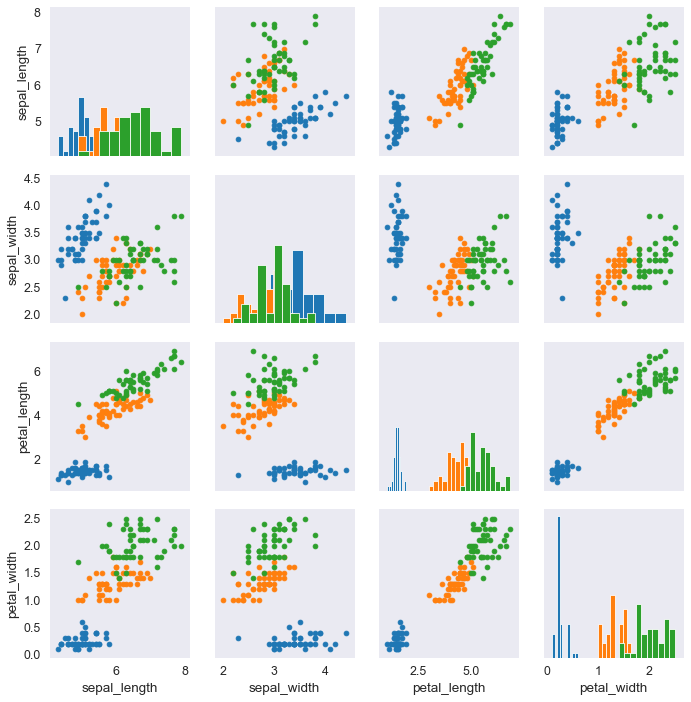

In [60]:
iris_g = sns.PairGrid(iris, hue="species")

iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)

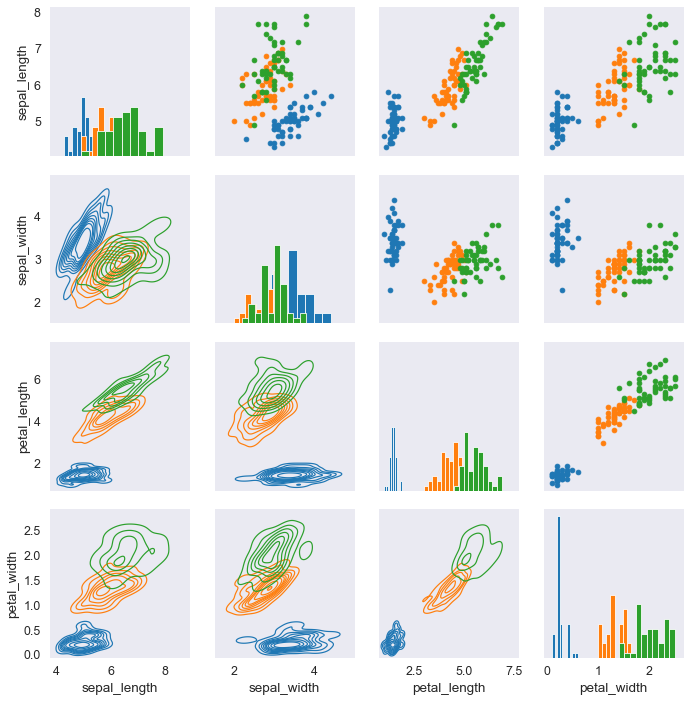

In [62]:
iris_g = sns.PairGrid(iris, hue="species")

iris_g.map_diag(plt.hist)
#iris_g.map_offdiag(plt.scatter)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

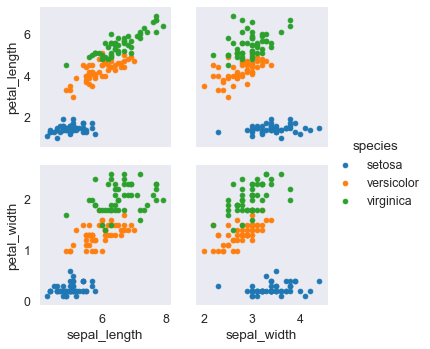

In [63]:
#can also define x and y for the iris dataset
iris_g = sns.PairGrid(iris, hue="species",
                     x_vars=["sepal_length", "sepal_width"],
                     y_vars=["petal_length", "petal_width"])
iris_g.map(plt.scatter)
iris_g.add_legend()


Facet Grid

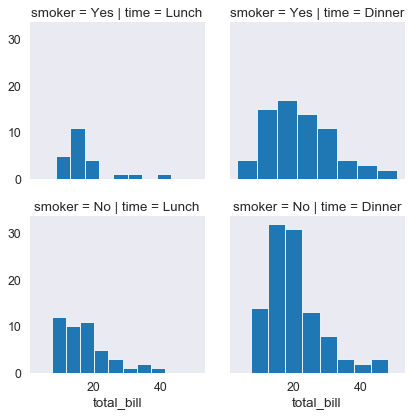

In [64]:
tips_fg = sns.FacetGrid(tips_df, col="time",row="smoker")
tips_fg.map(plt.hist, "total_bill", bins=8)

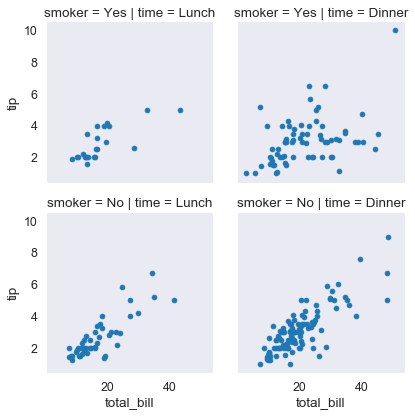

In [65]:
tips_fg = sns.FacetGrid(tips_df, col="time",row="smoker")
tips_fg.map(plt.scatter, "total_bill", "tip")

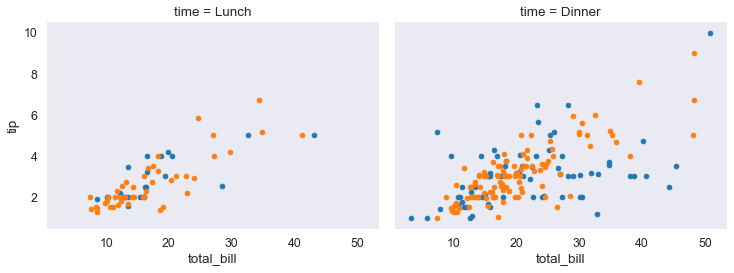

In [66]:
tips_fg = sns.FacetGrid(tips_df, col="time",hue="smoker", height=4, aspect=1.3) #aspect is width based off the height.
tips_fg.map(plt.scatter, "total_bill", "tip")

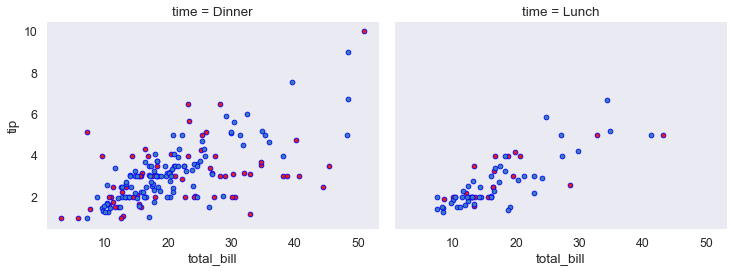

In [73]:
#say i want dinner to come before lunch
tips_fg = sns.FacetGrid(tips_df, col="time",hue="smoker", height=4, aspect=1.3,
                       col_order=['Dinner', 'Lunch'], palette="Set1") #aspect is width based off the height.
tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='b')#edge of the dots(called markers) in black

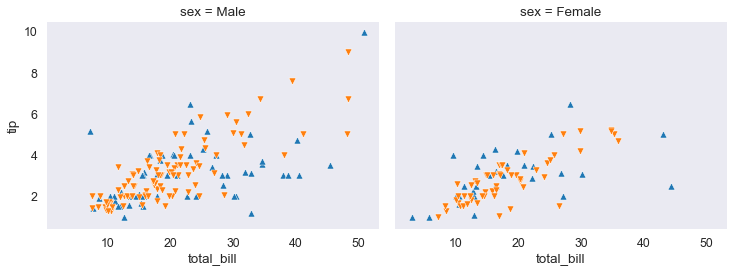

In [75]:
kws = dict(s=50, linewidth=.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col="sex", hue="smoker", height=4, aspect=1.3,
                       hue_order=['Yes', 'No'], hue_kws=dict(marker=['^', 'v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

In [76]:
#attention dataset
att_df = sns.load_dataset("attention")
att_df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


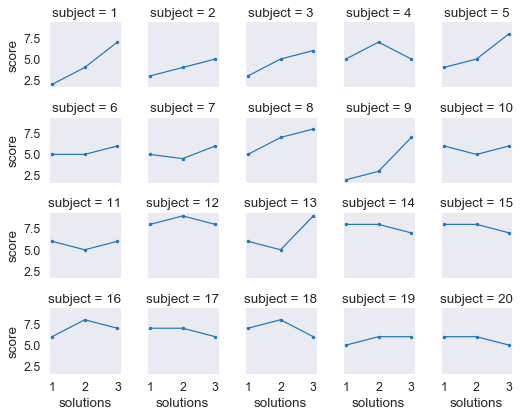

In [78]:
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5) #col_wrap takes 5 subjects per line
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

Regression plots

In [79]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

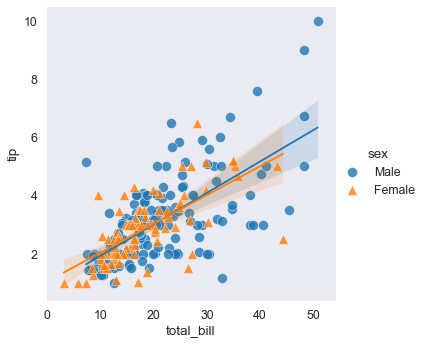

In [83]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor':'w'})

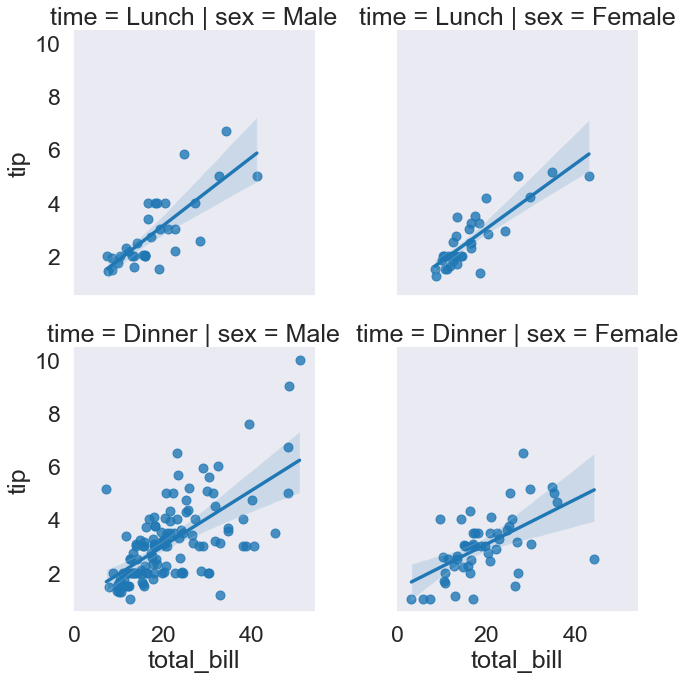

In [85]:
#can separate the data into different columns
sns.set_context('talk', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)

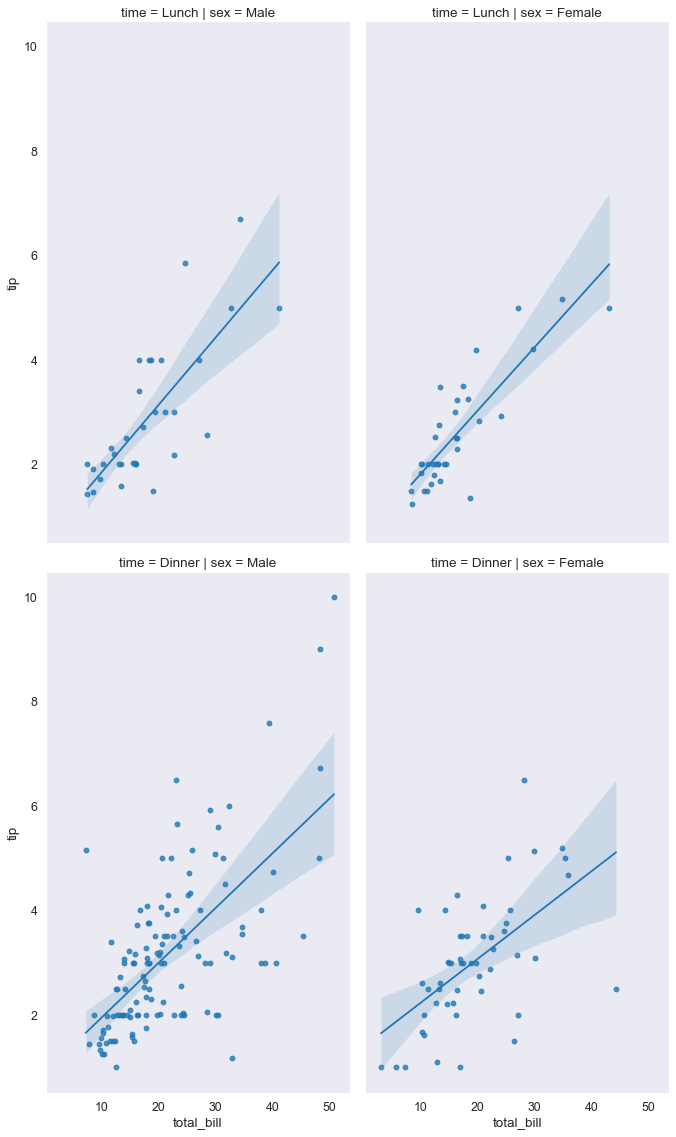

In [87]:
#can also play with the height and width:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df, 
          height=8, aspect=0.6)